# Testing FisherMatrix class with overlapping redshift bins

In [145]:
import crosspower as cp
import FisherCl as fcl
from numpy.linalg import eigh

# set plotting to be in the notebook instead of its own qt window
%matplotlib inline

In [146]:
# reload any changes that have been made to crosspower.py
reload(cp)
reload(fcl.cp)
reload(fcl)

<module 'FisherCl' from 'FisherCl.py'>

# Start with dndzMode=1, for observational dNdz cuves from Crocce et. al.

The following dN/dz curves were created by measuring photometric redshifts of galaxies in the DES-SV, using two different methods:
    BPZ and TPZ.  The resulting redshift distribution was then sliced into bins of equal width $\Delta z = 0.2$ 
    centerd at 0.3, 0.5, 0.7, 0.9, and 1.1.


These galaxies within each of these bins had estimated errors on their redshift measurements, and the estimated errors
    were stacked up for each galaxy within each bin, resulting in the following dN/dz curves.

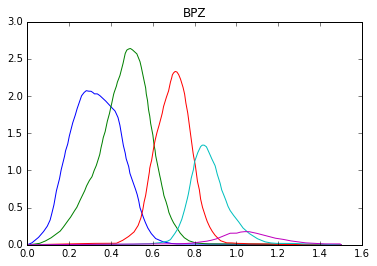

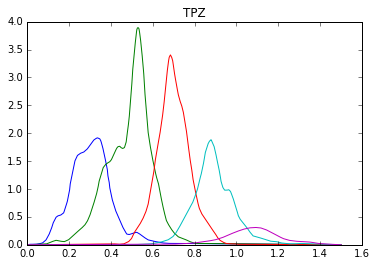

In [147]:
# show the dndz curves
cp.replotDigitizedDNDZ()

The dN/dz curves are defined well enough.  Next: how to associate these with W^kappa bins?

I want to slice up $W^\kappa$ in a way that sensibly preserves the property:

# $W^\kappa = \Sigma_{i=1}^{n_{Bins}+1} W^{\kappa_i}$

To do this, I use the dN/dz curves to define ratios that add up to 1 at every redshift:

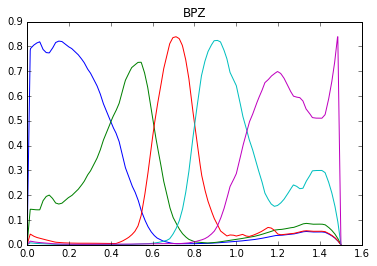

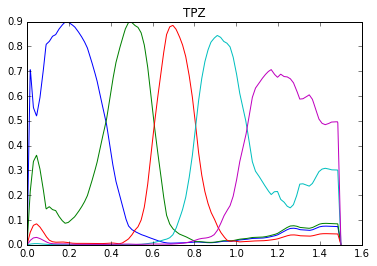

In [148]:
# calculate ratio of each bin to sum of bins
cp.plotDNDZratio()

In [149]:
# get matter power object for use in calculating CMB lensing kernel
myPk = cp.matterPower()

zs.size:  998


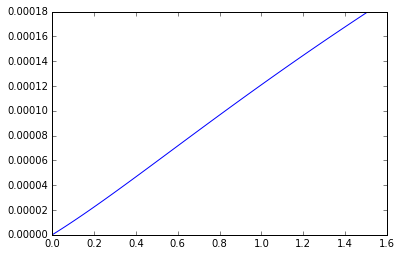

In [150]:
# show the CMB lensing kernel in this range
cp.plotWinKbins(myPk,zmin=0,zmax=1.5,nBins=1)

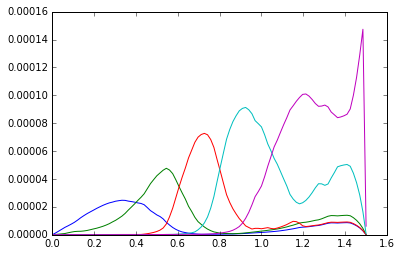

In [151]:
# show product of lensing kernel and BPZ bin ratio
cp.plotWinKbins(myPk,zmax=1.5,dndzMode=1,BPZ=True)

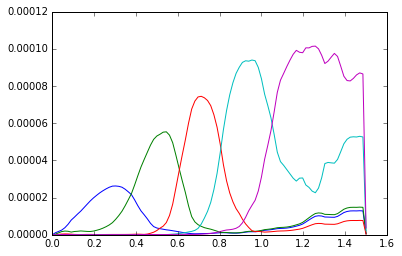

In [152]:
# show product of lensing kernel and TPZ bin ratio
cp.plotWinKbins(myPk,zmax=1.5,dndzMode=1,BPZ=False)

Using these dN/dz and winK bins, evaluate the Fisher Matrix

In [153]:
# get the Fisher Matrix object for the Crocce et. al. dNdz bins
Fobj1 = fcl.FisherMatrix(dndzMode=1,BPZ=True)
print 'fiducial As: ',Fobj1.binAs
print 'fiducial bs: ',Fobj1.binBs

creating matter power spectrum object...
zs.size:  998
fiducial bs:  [ 1.28088122  1.39288729  1.58521154  1.73152862  1.85179211]
fiducial As:  [ 1.00000291  1.00000325  1.00000189  1.00000544  1.00004046]
starting cross power with entire kappa... 
starting angular cross power spectrum  0 ,  0 ... 
window  1 : kappa  0
window  2 : kappa  0
starting angular cross power spectrum  0 ,  1 ... 
window  1 : kappa  0
window  2 : galaxies  1
starting angular cross power spectrum  0 ,  2 ... 
window  1 : kappa  0
window  2 : galaxies  2
starting angular cross power spectrum  0 ,  3 ... 
window  1 : kappa  0
window  2 : galaxies  3
starting angular cross power spectrum  0 ,  4 ... 
window  1 : kappa  0
window  2 : galaxies  4
starting angular cross power spectrum  0 ,  5 ... 
window  1 : kappa  0
window  2 : galaxies  5
starting angular cross power spectrum  1 ,  1 ... 
window  1 : galaxies  1
window  2 : galaxies  1
starting angular cross power spectrum  1 ,  2 ... 
window  1 : galaxies  1
win

In [154]:
# function to get sigmas
def getSigmas(Fobj):
    nBins = Fobj.nBins
    Finv = np.linalg.inv(Fobj.Fij)
    sigmas = np.sqrt(np.diag(Finv))
    sigmas_A = sigmas[:nBins]
    sigmas_b = sigmas[nBins:]
    return sigmas_A, sigmas_b

In [155]:
simgas_A1,sigmas_b1 = getSigmas(Fobj1)
print 'sigma_A_i: ',sigmas_A1
print 'sigma_b_i: ',sigmas_b1

sigma_A_i:  [ 0.00216128  0.00206541  0.00207029  0.0022882   0.00307431]
sigma_b_i:  [ 0.0032797   0.00355784  0.0038824   0.00432686  0.00595762]


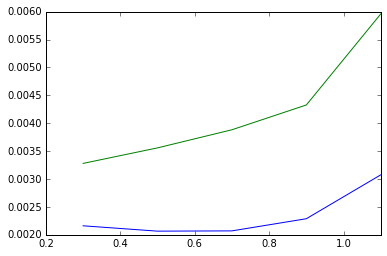

In [156]:
zs1 = Fobj1.getBinCenters()
plt.plot(zs1,sigmas_A1)
plt.plot(zs1,sigmas_b1);

In [157]:
# get the Fisher Matrix object for the Crocce et. al. dNdz bins
Fobj2 = fcl.FisherMatrix(dndzMode=1,BPZ=False)
print 'fiducial As: ',Fobj2.binAs
print 'fiducial bs: ',Fobj2.binBs

creating matter power spectrum object...
zs.size:  998
fiducial bs:  [ 1.28088122  1.39288729  1.58521154  1.73152862  1.85179211]
fiducial As:  [ 1.00000291  1.00000325  1.00000189  1.00000544  1.00004046]
starting cross power with entire kappa... 
starting angular cross power spectrum  0 ,  0 ... 
window  1 : kappa  0
window  2 : kappa  0
starting angular cross power spectrum  0 ,  1 ... 
window  1 : kappa  0
window  2 : galaxies  1
starting angular cross power spectrum  0 ,  2 ... 
window  1 : kappa  0
window  2 : galaxies  2
starting angular cross power spectrum  0 ,  3 ... 
window  1 : kappa  0
window  2 : galaxies  3
starting angular cross power spectrum  0 ,  4 ... 
window  1 : kappa  0
window  2 : galaxies  4
starting angular cross power spectrum  0 ,  5 ... 
window  1 : kappa  0
window  2 : galaxies  5
starting angular cross power spectrum  1 ,  1 ... 
window  1 : galaxies  1
window  2 : galaxies  1
starting angular cross power spectrum  1 ,  2 ... 
window  1 : galaxies  1
win

In [158]:
sigmas_A2,sigmas_b2 = getSigmas(Fobj2)
print 'sigma_A_i: ',sigmas_A2
print 'sigma_b_i: ',sigmas_b2

sigma_A_i:  [ 0.0026652   0.00222185  0.0024131   0.00233333  0.00302166]
sigma_b_i:  [ 0.00339603  0.00307747  0.00379958  0.00405084  0.00548586]


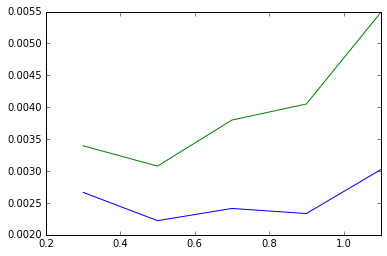

In [159]:
zs2 = Fobj2.getBinCenters()
plt.plot(zs2,sigmas_A2)
plt.plot(zs2,sigmas_b2);

Compare to non-overlapping case for 5 bins

In [160]:
# get the Fisher Matrix object for non-overlapping bins at the same redshifts as Crocce et. al. bins
Fobj3 = fcl.FisherMatrix(zmin=0.2,zmax=1.2,nBins=5,z0=0.3) #0.3 for LSST-like
print 'fiducial As: ',Fobj3.binAs
print 'fiducial bs: ',Fobj3.binBs

creating matter power spectrum object...
zs.size:  998
fiducial bs:  [ 1.26131627  1.42185391  1.586624    1.75283375  1.91969825]
fiducial As:  [ 1.  1.  1.  1.  1.]
starting cross power with entire kappa... 
starting angular cross power spectrum  0 ,  0 ... 
window  1 : kappa  0
window  2 : kappa  0
starting angular cross power spectrum  0 ,  1 ... 
window  1 : kappa  0
window  2 : galaxies  1
starting angular cross power spectrum  0 ,  2 ... 
window  1 : kappa  0
window  2 : galaxies  2
starting angular cross power spectrum  0 ,  3 ... 
window  1 : kappa  0
window  2 : galaxies  3
starting angular cross power spectrum  0 ,  4 ... 
window  1 : kappa  0
window  2 : galaxies  4
starting angular cross power spectrum  0 ,  5 ... 
window  1 : kappa  0
window  2 : galaxies  5
starting angular cross power spectrum  1 ,  1 ... 
window  1 : galaxies  1
window  2 : galaxies  1
starting angular cross power spectrum  1 ,  2 ... 
starting angular cross power spectrum  1 ,  3 ... 
starting angular

In [161]:
sigmas_A3,sigmas_b3 = getSigmas(Fobj3)
print 'sigma_A_i: ',sigmas_A3
print 'sigma_b_i: ',sigmas_b3

sigma_A_i:  [ 0.00222529  0.00194748  0.00190147  0.00195344  0.00200963]
sigma_b_i:  [ 0.00277168  0.00272524  0.00296694  0.0033683   0.00379822]


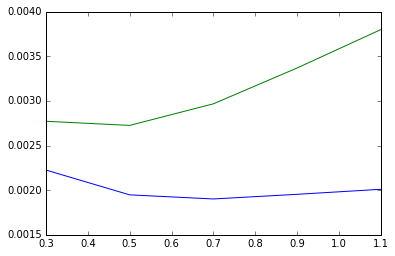

In [162]:
zs3 = Fobj3.getBinCenters()
plt.plot(zs3,sigmas_A3)
plt.plot(zs3,sigmas_b3);

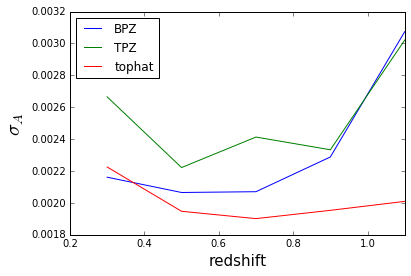

In [163]:
# plot sigma_As together
plt.plot(zs1,sigmas_A1,label='BPZ')
plt.plot(zs2,sigmas_A2,label='TPZ')
plt.plot(zs3,sigmas_A3,label='tophat')
plt.xlabel('redshift',fontsize=15)
plt.ylabel(r'$\sigma_A$',fontsize=20)
plt.legend(loc='upper left');

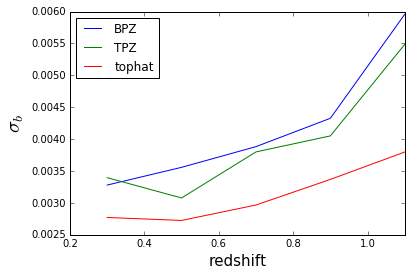

In [164]:
# plot sigma_bs together
plt.plot(zs1,sigmas_b1,label='BPZ')
plt.plot(zs2,sigmas_b2,label='TPZ')
plt.plot(zs3,sigmas_b3,label='tophat')
plt.xlabel('redshift',fontsize=15)
plt.ylabel(r'$\sigma_b$',fontsize=20)
plt.legend(loc='upper left');

# Use model dN/dz curves that overlap (dndzMode = 2)

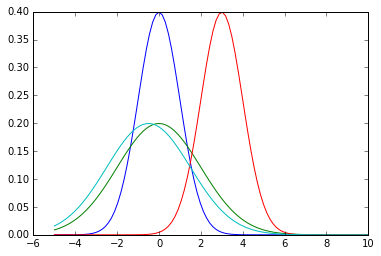

In [166]:
reload(cp)
cp.plotGaussians()